In [2]:
from google.colab import files
uploaded = files.upload()  # 會跳出視窗讓你選擇 CSV 上傳



Saving classification.csv to classification.csv


Dataset Explanation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.metrics import roc_curve, auc, confusion_matrix
# Load Dataset
file_path = "classification.csv"
df = pd.read_csv(file_path)

# Display dataset information and preview
df_info = df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [4]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


**Dataset Explanation**

This dataset appears to be a binary classification dataset where the goal is to predict a categorical outcome (y) based on various demographic and economic factors.

**Dataset Structure**
1. Number of Rows: 48,842
2. Number of Columns: 11
3. Target Variable: y (Binary: 0 or 1)
4. Feature Variables (Categorical):
* hours_per_week_bin: Categorized work hours per week.
* occupation_bin: Grouped occupation levels.
* msr_bin: Economic or marital status classification.
* capital_gl_bin: Categorized capital gain/loss.
* race_sex_bin: Combined race and gender category.
* education_num_bin: Grouped education years.
* education_bin: Education level classification.
* workclass_bin: Type of work category.
* age_bin: Age grouped into bins.
* flag: Indicates training (train) or test (test) set.

Classification Tasks: The goal of the classification model (Logistic/Probit Regression) is to predict y, which is a binary label (0 or 1). What are we classifying? We are predicting whether an individual earns more than 50K per year based on demographic and work-related factors.

Data preparation

In [5]:
# Data Preparation
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

# Split dataset into train and test
y_train = df[df['flag']=='train']['y']
x_train = df[df['flag']=='train'][cat_feats]
x_train = pd.get_dummies(x_train, columns=cat_feats, drop_first=True)

y_test = df[df['flag']=='test']['y']
x_test = df[df['flag']=='test'][cat_feats]
x_test = pd.get_dummies(x_test, columns=cat_feats, drop_first=True)

# Convert to numpy arrays
x_train, y_train = x_train.values, y_train.values
x_test, y_test = x_test.values, y_test.values

# Apply manual feature scaling
mean_train = np.mean(x_train, axis=0)
std_train = np.std(x_train, axis=0)
x_train_scaled = (x_train - mean_train) / std_train
x_test_scaled = (x_test - mean_train) / std_train


Assignment

<ipython-input-7-3b91d20fc171>:85: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


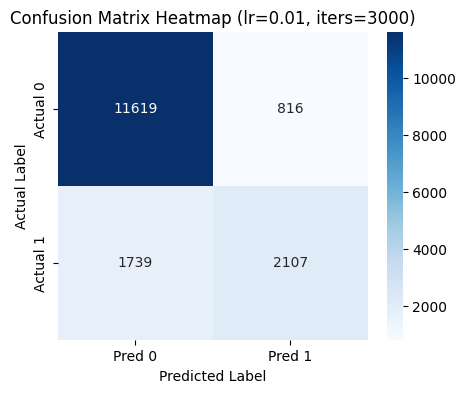

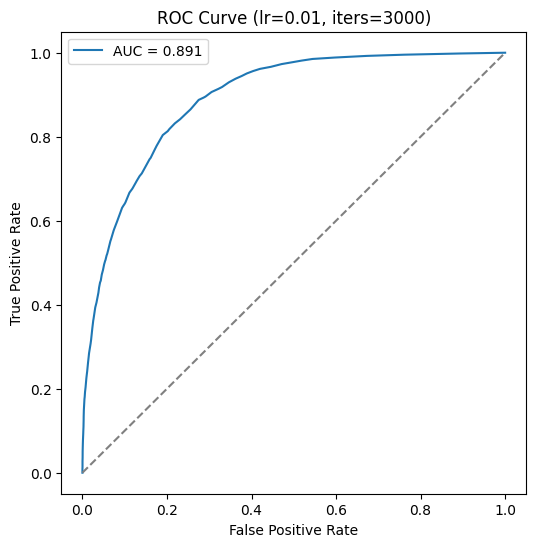

<ipython-input-7-3b91d20fc171>:85: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


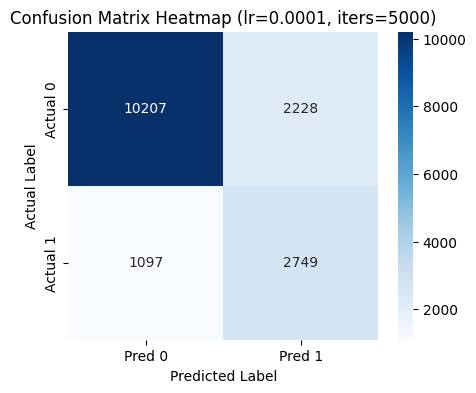

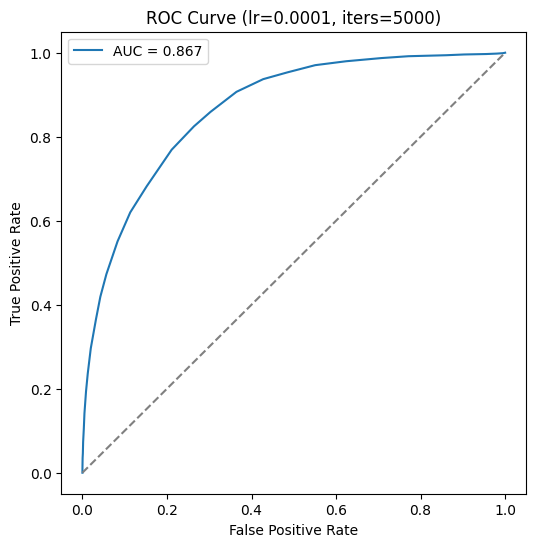

<ipython-input-7-3b91d20fc171>:85: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


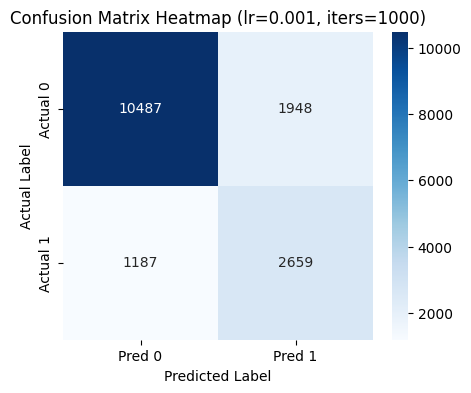

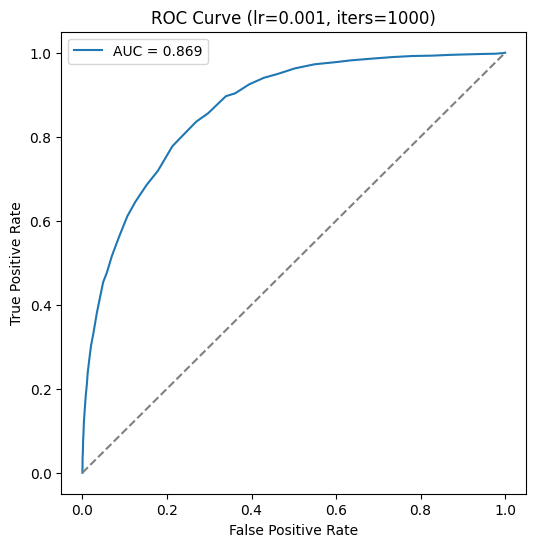

Learning Rate: 0.01, Iterations: 3000
Precision: 0.721, Recall: 0.548, Accuracy: 0.843, F1-Score: 0.623, AUC: 0.891

Learning Rate: 0.0001, Iterations: 5000
Precision: 0.552, Recall: 0.715, Accuracy: 0.796, F1-Score: 0.623, AUC: 0.867

Learning Rate: 0.001, Iterations: 1000
Precision: 0.577, Recall: 0.691, Accuracy: 0.807, F1-Score: 0.629, AUC: 0.869



In [7]:

y_train = df[df['flag'] == 'train']['y']
x_train = df[df['flag'] == 'train'][cat_feats]
x_train = pd.get_dummies(x_train, columns=cat_feats, drop_first=True)

y_test = df[df['flag'] == 'test']['y']
x_test = df[df['flag'] == 'test'][cat_feats]
x_test = pd.get_dummies(x_test, columns=cat_feats, drop_first=True)

x_train, y_train = x_train.values, y_train.values
x_test, y_test = x_test.values, y_test.values

# Feature Scaling
mean_train = np.mean(x_train, axis=0)
std_train = np.std(x_train, axis=0)
x_train_scaled = (x_train - mean_train) / std_train
x_test_scaled = (x_test - mean_train) / std_train

# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=3000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# 計算混淆矩陣
def compute_confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TN, FP], [FN, TP]])

# 計算評估指標
def compute_metrics(y_true, y_pred):
    cm = compute_confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return precision, recall, accuracy, f1_score

# 計算 ROC 曲線
def compute_roc_curve(y_true, y_scores):
    thresholds = np.linspace(1, 0, 100)
    tpr_list, fpr_list = [], []
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        cm = compute_confusion_matrix(y_true, y_pred)
        TN, FP, FN, TP = cm.ravel()
        tpr = TP / (TP + FN) if (TP + FN) != 0 else 0
        fpr = FP / (FP + TN) if (FP + TN) != 0 else 0
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return np.array(fpr_list), np.array(tpr_list)

# 計算 AUC
def compute_auc(fpr, tpr):
    return np.trapz(tpr, fpr)

# 訓練與測試模型
learning_rates = [0.01, 0.0001, 0.001]
iterations = [3000, 5000, 1000]

results = {}
for lr, iters in zip(learning_rates, iterations):
    model = LogisticRegressionScratch(learning_rate=lr, iterations=iters)
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    y_prob = model.predict_proba(x_test_scaled)

    precision, recall, accuracy, f1_score = compute_metrics(y_test, y_pred)
    fpr, tpr = compute_roc_curve(y_test, y_prob)
    auc_score = compute_auc(fpr, tpr)

    results[(lr, iters)] = {
        "precision": precision,
        "recall": recall,
        "accuracy": accuracy,
        "f1_score": f1_score,
        "auc": auc_score
    }

    # 繪製混淆矩陣熱圖
    cm = compute_confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix Heatmap (lr={lr}, iters={iters})")
    plt.show()
    # 繪製 ROC 曲線
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (lr={lr}, iters={iters})')
    plt.legend()
    plt.show()

# 顯示結果
for key, value in results.items():
    print(f"Learning Rate: {key[0]}, Iterations: {key[1]}")
    print(f"Precision: {value['precision']:.3f}, Recall: {value['recall']:.3f}, Accuracy: {value['accuracy']:.3f}, F1-Score: {value['f1_score']:.3f}, AUC: {value['auc']:.3f}\n")